In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# NPL
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/daniel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/daniel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv("../data/DaFuqBoom_video_data_UP.csv") 
df.shape

(260, 20)

In [3]:
df.head()

,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,durationSecs,tagsCount,likeRatio,commentRatio,titleLength
0,0,iEg0ocBj04E,DaFuq!?Boom!,skibidi toilet 67 (part 4),titan tvman has returned\n\nspecial thanks to ...,"['skibidi meme', 'sfm animation', 'funny anima...",2023-11-16 00:00:30+00:00,7467378,677575,NaN,13537,PT1M,hd,False,Thursday,60.0,9,90.738007,1.812818,26
1,1,K8Ava2C-Bpk,DaFuq!?Boom!,skibidi toilet 67 (part 3),everyone has their weakness\n\nspecial thanks ...,"['skibidi meme', 'sfm animation', 'funny anima...",2023-11-15 11:40:00+00:00,5312376,468984,NaN,7971,PT47S,hd,False,Wednesday,47.0,9,88.281402,1.500459,26
2,2,O0UgonjJXbY,DaFuq!?Boom!,skibidi toilet 67 (part 2),something unexpected happened\n\nspecial thank...,"['skibidi meme', 'sfm animation', 'funny anima...",2023-11-15 00:00:11+00:00,3407580,299554,NaN,4338,PT1M,hd,False,Wednesday,60.0,9,87.908134,1.273044,26
3,3,vIgnPmmcSXs,DaFuq!?Boom!,skibidi toilet 67 (part 3),everyone has their weakness\nfull-screen versi...,"['skibidi meme', 'sfm animation', 'funny anima...",2023-11-14 02:00:09+00:00,38130527,1819178,NaN,187889,PT2M8S,hd,False,Tuesday,128.0,10,47.709228,4.927522,26
4,4,w6jQh2UB2ug,DaFuq!?Boom!,skibidi toilet 67 (part 2),someone has returned\nfull-screen version\n\ns...,"['skibidi meme', 'sfm animation', 'funny anima...",2023-11-03 17:45:03+00:00,48891821,1333963,NaN,231208,PT1M22S,hd,False,Friday,82.0,9,27.283970,4.728971,26


## EDA

### Best performing video

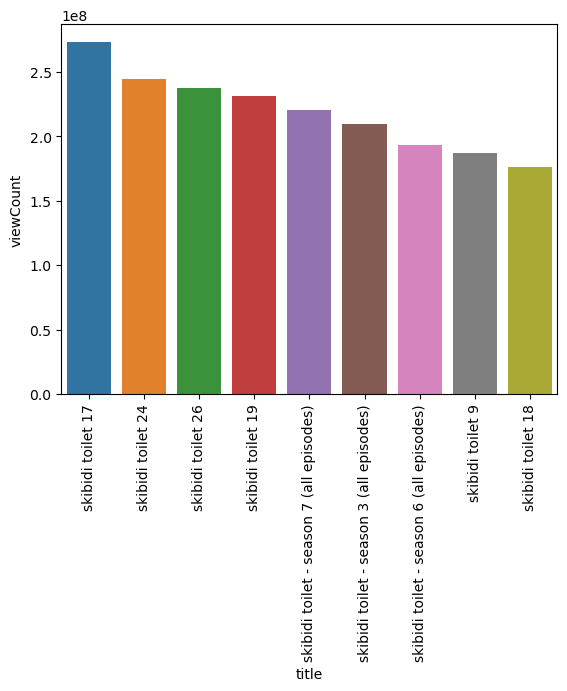

In [4]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = df.sort_values('viewCount', ascending=False)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

### worst performing video

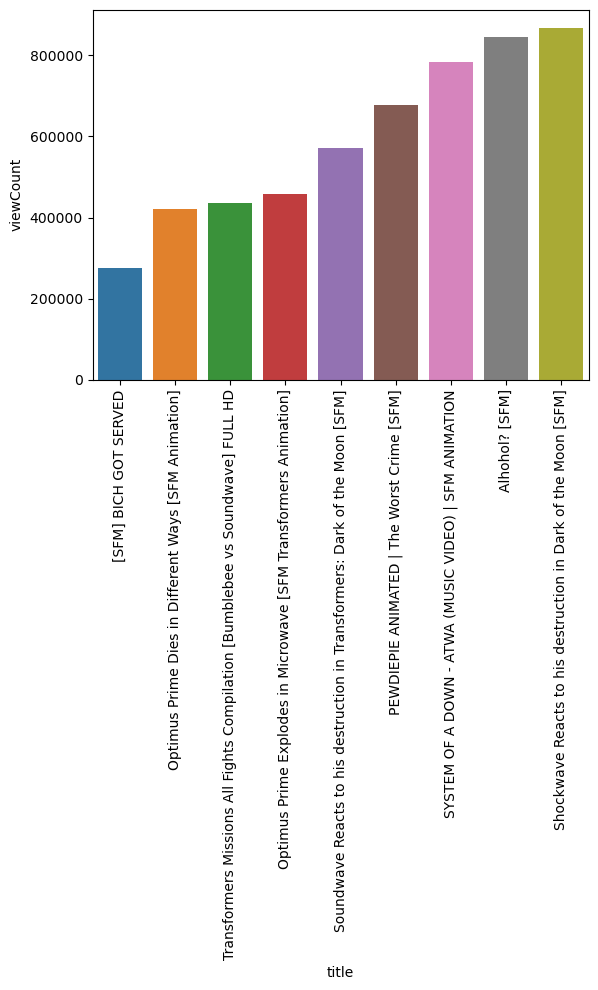

In [5]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = df.sort_values('viewCount', ascending=True)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

### video distribution per video

<AxesSubplot:xlabel='channelTitle', ylabel='viewCount'>

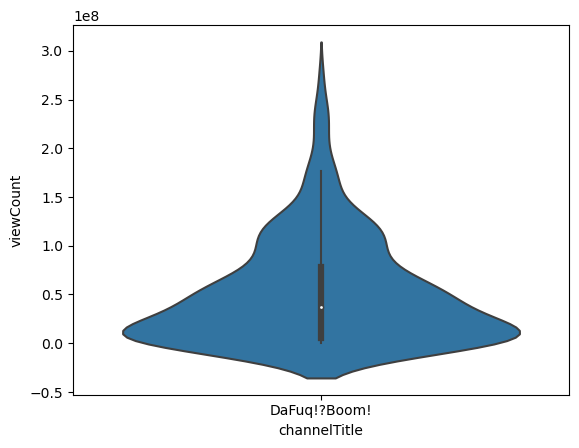

In [6]:
sns.violinplot(data=df, x='channelTitle', y='viewCount')

### views vs. likes and comments

<AxesSubplot:xlabel='likeCount', ylabel='viewCount'>

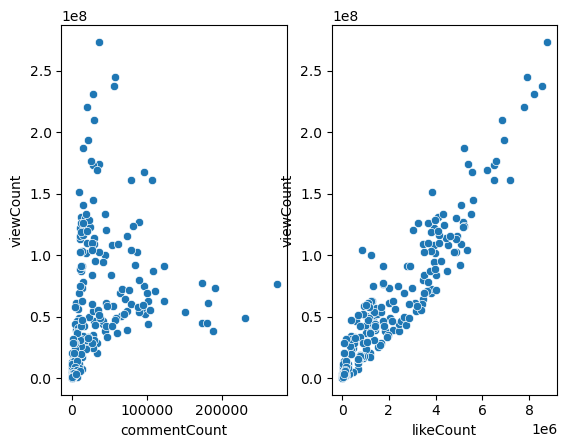

In [7]:
fig, ax = plt.subplots(1, 2)
sns.scatterplot(data=df, x = 'commentCount', y='viewCount', ax = ax[0])
sns.scatterplot(data=df, x = 'likeCount', y='viewCount', ax = ax[1])

### video duration

<AxesSubplot:xlabel='durationSecs', ylabel='Count'>

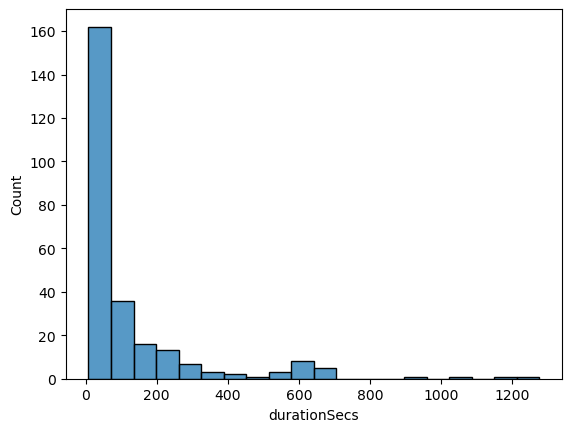

In [8]:
sns.histplot(data = df, x = 'durationSecs', bins=20)

### wordcloud for video title

In [9]:
stop_words = set(stopwords.words('english'))
df['title_no_stopwords'] = df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

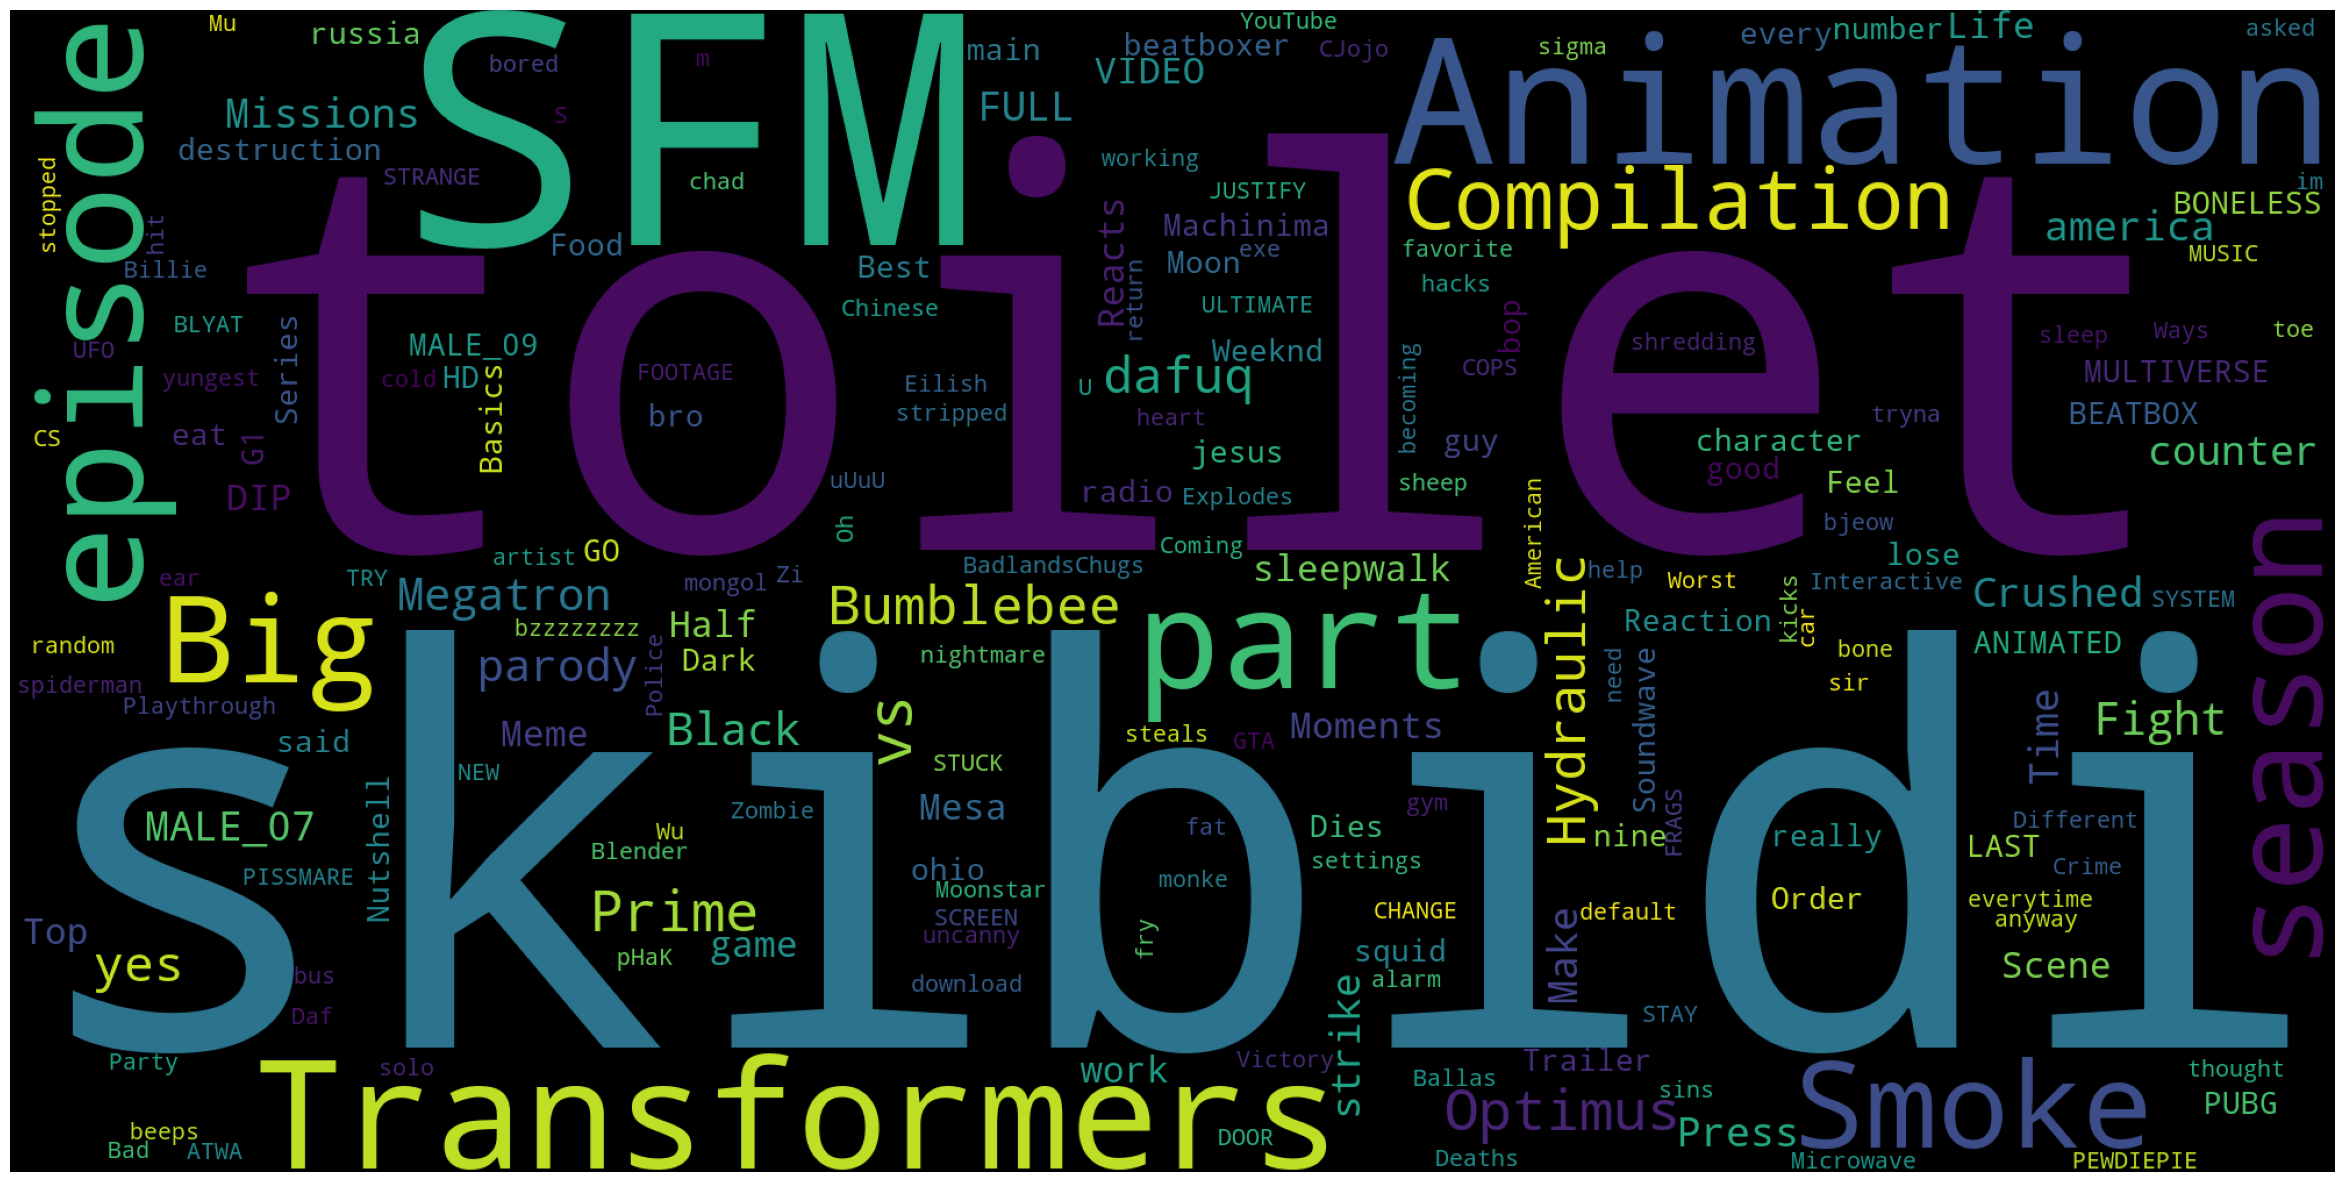

In [10]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

### number of tags vs views

<AxesSubplot:xlabel='tagsCount', ylabel='viewCount'>

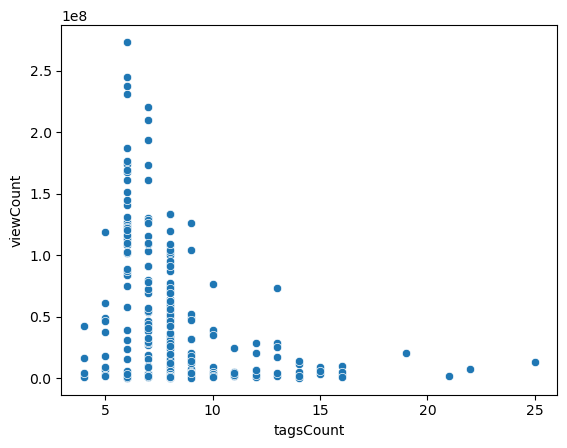

In [11]:
sns.scatterplot(data = df, x = "tagsCount", y = "viewCount")

### which days in the week are most videos uploaded?

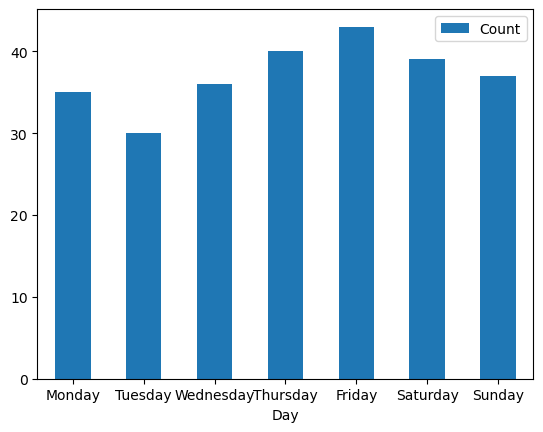

In [12]:
day_df = pd.DataFrame(df['pushblishDayName'].value_counts())
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)
day_df.reset_index(inplace=True)
day_df.columns = ['Day', 'Count']

# Create a bar plot
ax = day_df.plot.bar(x='Day', y='Count', rot=0)

# Show the plot
plt.show()

### wordcloud for video comment

In [13]:
comments_df = pd.read_csv("../data/DaFuqBoom_comments_data.csv")

stop_words = set(stopwords.words('english'))
comments_df['comments_no_stopwords'] = comments_df['comments'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in comments_df['comments_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words)

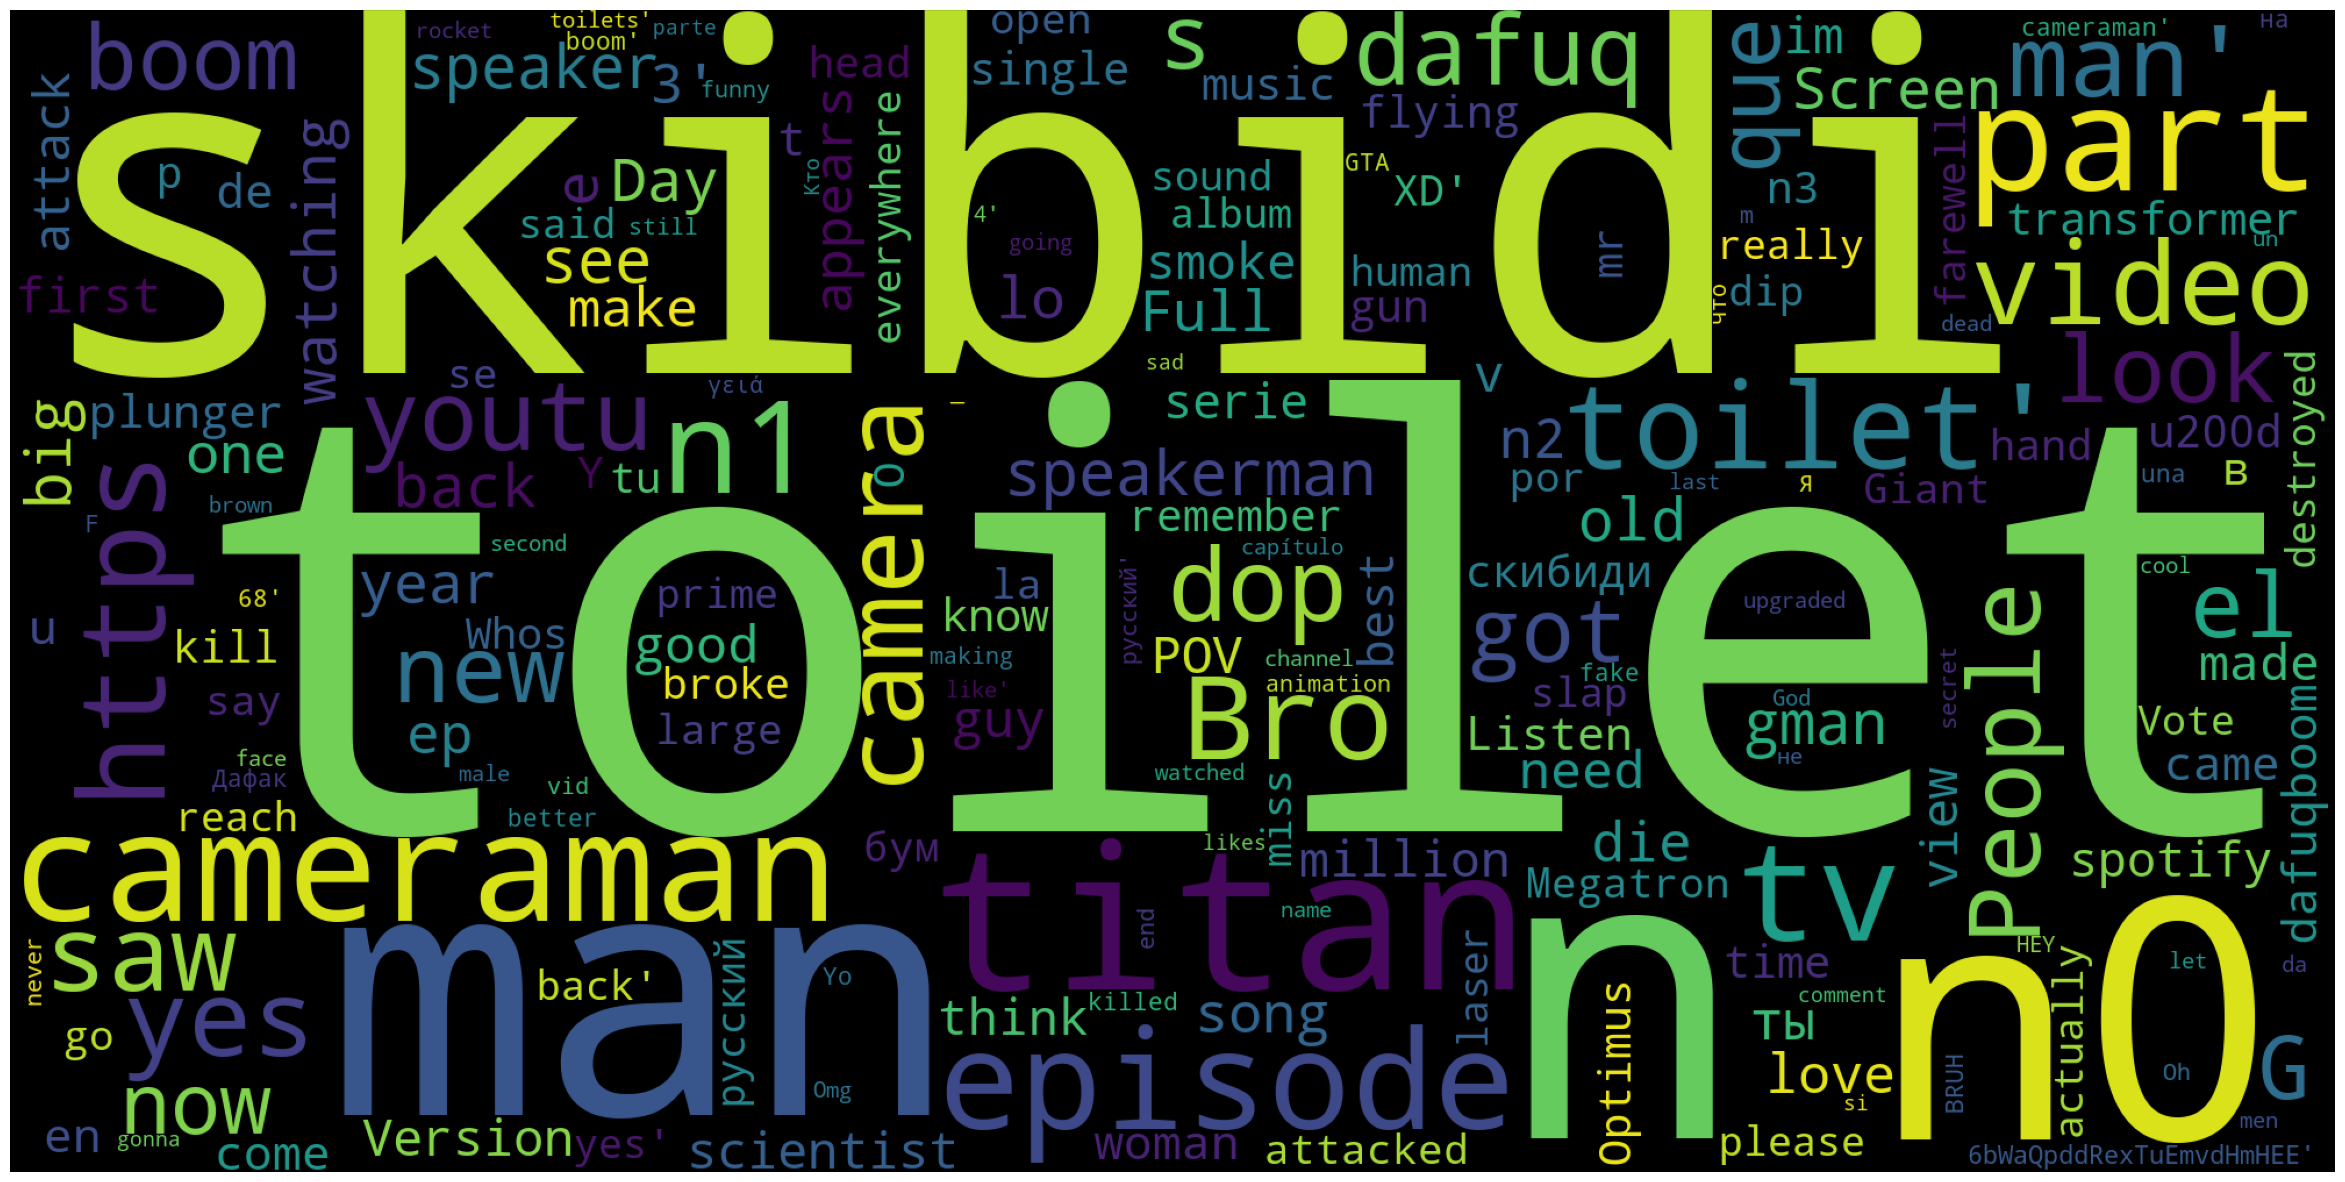

In [14]:
wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)